<a href="https://colab.research.google.com/github/Astha32/News-Headline-Generation/blob/main/Prepare_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing the libraries to be used
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
import string
import re,codecs

import random
import math
import time

### Fetching the data

The dataset used is the BBC news dataset available at: http://mlg.ucd.ie/datasets/bbc.html .

It consists of 2225 documents from the BBC news website corresponding to stories in five topical areas(business, entertainment, politics, sport, tech) from 2004-2005.


In [ ]:
!unzip "/content/bbc-fulltext.zip" -d "/content/bbc-fulltext"

Archive:  /content/bbc-fulltext.zip
   creating: /content/bbc-fulltext/bbc/
   creating: /content/bbc-fulltext/bbc/business/
  inflating: /content/bbc-fulltext/bbc/business/001.txt  
  inflating: /content/bbc-fulltext/bbc/business/002.txt  
  inflating: /content/bbc-fulltext/bbc/business/003.txt  
  inflating: /content/bbc-fulltext/bbc/business/004.txt  
  inflating: /content/bbc-fulltext/bbc/business/005.txt  
  inflating: /content/bbc-fulltext/bbc/business/006.txt  
  inflating: /content/bbc-fulltext/bbc/business/007.txt  
  inflating: /content/bbc-fulltext/bbc/business/008.txt  
  inflating: /content/bbc-fulltext/bbc/business/009.txt  
  inflating: /content/bbc-fulltext/bbc/business/010.txt  
  inflating: /content/bbc-fulltext/bbc/business/011.txt  
  inflating: /content/bbc-fulltext/bbc/business/012.txt  
  inflating: /content/bbc-fulltext/bbc/business/013.txt  
  inflating: /content/bbc-fulltext/bbc/business/014.txt  
  inflating: /content/bbc-fulltext/bbc/business/015.txt  
  inf

In [ ]:
import glob
def read_dir(path):

  files=glob.glob(path+"/*.txt") 
  df = pd.DataFrame(columns=['Article','Headline']) 
  for filename in files:
    with open(filename, encoding='utf-8', errors='ignore') as f: 
      c=0
      article=""
      headline=""
      for line in f:
        if(line=="\n"):
          continue
        c+=1
        if(c==1):
          headline = line
        # if c==2:
        #   headline+=line+" "
        else:
          article+=line+" "
      # print(len(article.split())<=800 )
      if len(article.split())<=400:
        newdf = pd.DataFrame(data={'Article': [article], 'Headline': [headline]})
        df = df.append(newdf, ignore_index=True)
  
  return df  

In [ ]:
folders = ['business','entertainment', 'politics','sport','tech']
path = "/content/bbc-fulltext/bbc/"
dataset = pd.DataFrame(columns=['Article','Headline'])
for folder in folders:
  dataset = dataset.append(read_dir(path+folder), ignore_index=True)

dataset = shuffle(dataset)

In [ ]:
dataset.describe

<bound method NDFrame.describe of                                                 Article                             Headline
1158  Southampton's David Prutton faces a possible s...  Prutton poised for lengthy FA ban\n
187   Nike has reported its best second-quarter earn...   Strong quarterly growth for Nike\n
1002  Barcelona's pursuit of the Spanish title took ...  Barcelona title hopes hit by loss\n
1073  Celtic's Neil Lennon admits Rangers could be c...   Lennon brands Rangers favourites\n
1342  The first convictions for piracy over peer-to-...  US peer-to-peer pirates convicted\n
...                                                 ...                                  ...
1410  Security firms are warning about several mobil...      Fast moving phone bugs appear\n
171   Oil prices carried on rising on Wednesday afte...  Winter freeze keeps oil above $50\n
1184  Leicester withstood a stunning Wasps comeback ...              Wasps 31-37 Leicester\n
811   The majority of young people a

### Text Preprocessing

1. Removed stopwords.
2. Expanded Contractions.
3. Converted text to lower case.
4. Cleaned the data by removing punctuations, digits, apostrophe. 

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",

                           "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",

                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",

                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",

                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",

                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",

                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",

                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",

                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",

                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",

                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",

                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",

                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",

                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",

                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",

                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",

                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",

                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",

                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",

                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",

                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",

                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",

                           "you're": "you are", "you've": "you have"}

In [ ]:

def text_cleaner(text):
  newString = text.lower()  
  newString = re.sub(r"'s\b","",newString)
 
  # newString = newString.replace('\n','')
  # newString = newString.replace('.',' ')
  
  newString = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in newString.split(" ")])   
  replace_list = ['\n', '.', '!', '?']
  for i in replace_list:
    newString = newString.replace(i, '') 
  newString = re.sub("[^a-zA-Z]", " ", newString)
  
  tokens=newString.split()
  newString=''
  for i in tokens:
      if len(i)>=3:                                 
          newString=newString+i+' '  
  return newString

In [ ]:
processed_data = dataset.applymap(text_cleaner)

In [ ]:
processed_data.rename(columns={"Article": "Cleaned_Article", "Headline": "Cleaned_Headline"})

,Cleaned_Article,Cleaned_Headline
1158,southampton david prutton faces possible seven...,prutton poised for lengthy ban
187,nike has reported its best second quarter earn...,strong quarterly growth for nike
1002,barcelona pursuit the spanish title took blow ...,barcelona title hopes hit loss
1073,celtic neil lennon admits rangers could consid...,lennon brands rangers favourites
1342,the first convictions for piracy over peer pee...,peer peer pirates convicted
...,...,...
1410,security firms are warning about several mobil...,fast moving phone bugs appear
171,oil prices carried rising wednesday after cold...,winter freeze keeps oil above
1184,leicester withstood stunning wasps comeback wi...,wasps leicester
811,the majority young people are interested polit...,youth interested politics


In [ ]:
processed_data['Article'][0]

'germany economy shrank the last three months upsetting hopes sustained recovery the figures confounded hopes expansion the fourth quarter europe biggest economy the federal statistics office said growth for the whole was after year contraction down from earlier estimate said growth the third quarter had been zero putting the economy standstill from july onward germany has been reliant exports get its economy back track unemployment more than five million and impending cuts welfare mean german consumers have kept their money themselves major companies including volkswagen daimlerchrysler and siemens have spent much tough talks with unions about trimming jobs and costs according the statistics office destatis rising exports were outweighed the fourth quarter the continuing weakness domestic demand but the relentless rise the value the euro last year has also hit the competitiveness german products overseas the effect has been depress prospects for the nation eurozone whole well germany 

In [ ]:
processed_data.columns = ['Cleaned_Article', 'Cleaned_Headline']

In [ ]:
dataset.head()

,Article,Headline
1158,Southampton's David Prutton faces a possible s...,Prutton poised for lengthy FA ban\n
187,Nike has reported its best second-quarter earn...,Strong quarterly growth for Nike\n
1002,Barcelona's pursuit of the Spanish title took ...,Barcelona title hopes hit by loss\n
1073,Celtic's Neil Lennon admits Rangers could be c...,Lennon brands Rangers favourites\n
1342,The first convictions for piracy over peer-to-...,US peer-to-peer pirates convicted\n


In [ ]:
# dataset.rename(columns={"Article": "Original_Article", "Headline": "Original_Headline"})
dataset = pd.concat([dataset, processed_data], axis=1)
dataset

,Article,Headline,Cleaned_Article,Cleaned_Headline
1158,Southampton's David Prutton faces a possible s...,Prutton poised for lengthy FA ban\n,southampton david prutton faces possible seven...,prutton poised for lengthy ban
187,Nike has reported its best second-quarter earn...,Strong quarterly growth for Nike\n,nike has reported its best second quarter earn...,strong quarterly growth for nike
1002,Barcelona's pursuit of the Spanish title took ...,Barcelona title hopes hit by loss\n,barcelona pursuit the spanish title took blow ...,barcelona title hopes hit loss
1073,Celtic's Neil Lennon admits Rangers could be c...,Lennon brands Rangers favourites\n,celtic neil lennon admits rangers could consid...,lennon brands rangers favourites
1342,The first convictions for piracy over peer-to-...,US peer-to-peer pirates convicted\n,the first convictions for piracy over peer pee...,peer peer pirates convicted
...,...,...,...,...
1410,Security firms are warning about several mobil...,Fast moving phone bugs appear\n,security firms are warning about several mobil...,fast moving phone bugs appear
171,Oil prices carried on rising on Wednesday afte...,Winter freeze keeps oil above $50\n,oil prices carried rising wednesday after cold...,winter freeze keeps oil above
1184,Leicester withstood a stunning Wasps comeback ...,Wasps 31-37 Leicester\n,leicester withstood stunning wasps comeback wi...,wasps leicester
811,The majority of young people are interested in...,UK youth 'interested' in politics\n,the majority young people are interested polit...,youth interested politics


In [ ]:
dataset.replace('', np.nan, inplace=True)
dataset.dropna(axis=0,inplace=True)

5


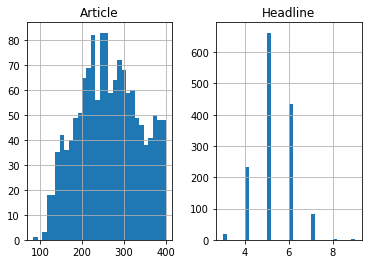

In [ ]:
# Check the text length distribution

import matplotlib.pyplot as plt
import statistics

article_word_count = []
headline_word_count = []
summary_word_count = []

# populate the lists with sentence lengths
for i in dataset['Article']:
      article_word_count.append(len(i.split()))

for i in dataset['Headline']:
      headline_word_count.append(len(i.split()))


mode_headline = statistics.mode(headline_word_count)
print(mode_headline)
length_df = pd.DataFrame({'Article':article_word_count, 'Headline':headline_word_count})
length_df.hist(bins = 30)
plt.show()

In [ ]:
dataset['Headline'][0]

'German growth goes into reverse\n'

### Preparing csv files from dataframe

In [ ]:
dataset.to_csv('BBCNewsDataComplete.csv', index=False, header=False)

In [ ]:
from sklearn.model_selection import train_test_split

train, val = train_test_split(processed_data, test_size=0.2)

In [ ]:
train.describe

<bound method NDFrame.describe of                                         Cleaned_Article                   Cleaned_Headline
1413  the once famous commodore computer brand could...    commodore finds new lease life 
1018  fifth seed robin soderling took the milan indo...  soderling wins tense milan final 
1106  iranian striker vahid hashemian will not trave...       iranian misses israel match 
763   gordon brown has outlined what thinks should t...  brown outlines third term vision 
728   the biggest civil service union ballot its mem...      civil servants strike ballot 
...                                                 ...                                ...
713   japan box office received boost last year with...    howl helps boost japan cinemas 
954   england have named bath prop matt stevens the ...        stevens named england line 
1071  leroy lita took his goal tally for the season ...        bristol city milton keynes 
901   susan chepkemei has decided she fit enough run... 

In [ ]:
train.to_csv('BBCnews_trainset.csv', index=False, header=False)
val.to_csv('BBCnews_testset.csv', index=False, header=False)